# Wine Project Report

We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

Target: Using chemical analysis determine the origin of wines.

Link to data source and data details: http://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import csv
import os
import numpy as np
np.set_printoptions(suppress=True)
import random
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

The following codes make output result in more standard format and do not affect numerical result.

In [2]:
np.set_printoptions(suppress=True) # always print floating point numbers using fixed point notation
plt.rcParams['savefig.dpi'] = 50 # (DPI/Image resolution)
plt.rcParams['figure.dpi'] = 50 #

Since the last column *Customer_Segment* is labeled (**qualitative**) data while all other columns are unlabeled (**quantitative**) data, which are not suitable for aggregated analysis or modelling since some machine learning algorithm like *k-means* only support unlabeled data. So we first try to use pandas to read the original csv file, and save only the relevant columns to a new csv file

In [53]:
fname_in = 'Wine.csv'
fname_out = 'Wine_del.csv'

f_in = pd.read_csv(fname_in)
f_in.iloc[:, :13].to_csv(fname_out)

We first read in the raw data for analysis by using command `pd.read_csv()`

In [4]:
wine = pd.read_csv(fname_out, index_col=0)

# 1. Data Exploration and Pre-processing

## 1.1 Discriptive Statistics

In [5]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [7]:
wine.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

## 1.2 Discriptive Diagrams

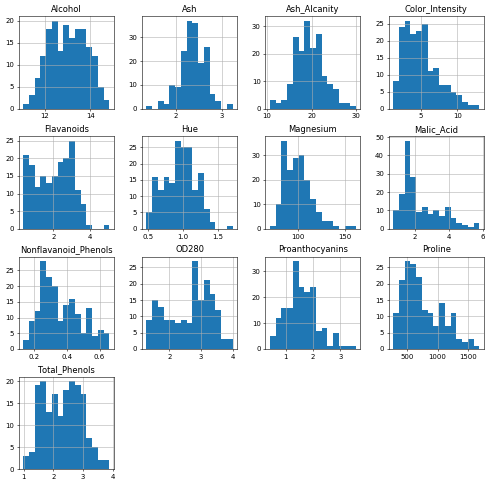

In [8]:
#Histograms for 13 variables
wine.hist(figsize=(12,12),bins=15, layout=(4,4))
plt.show()

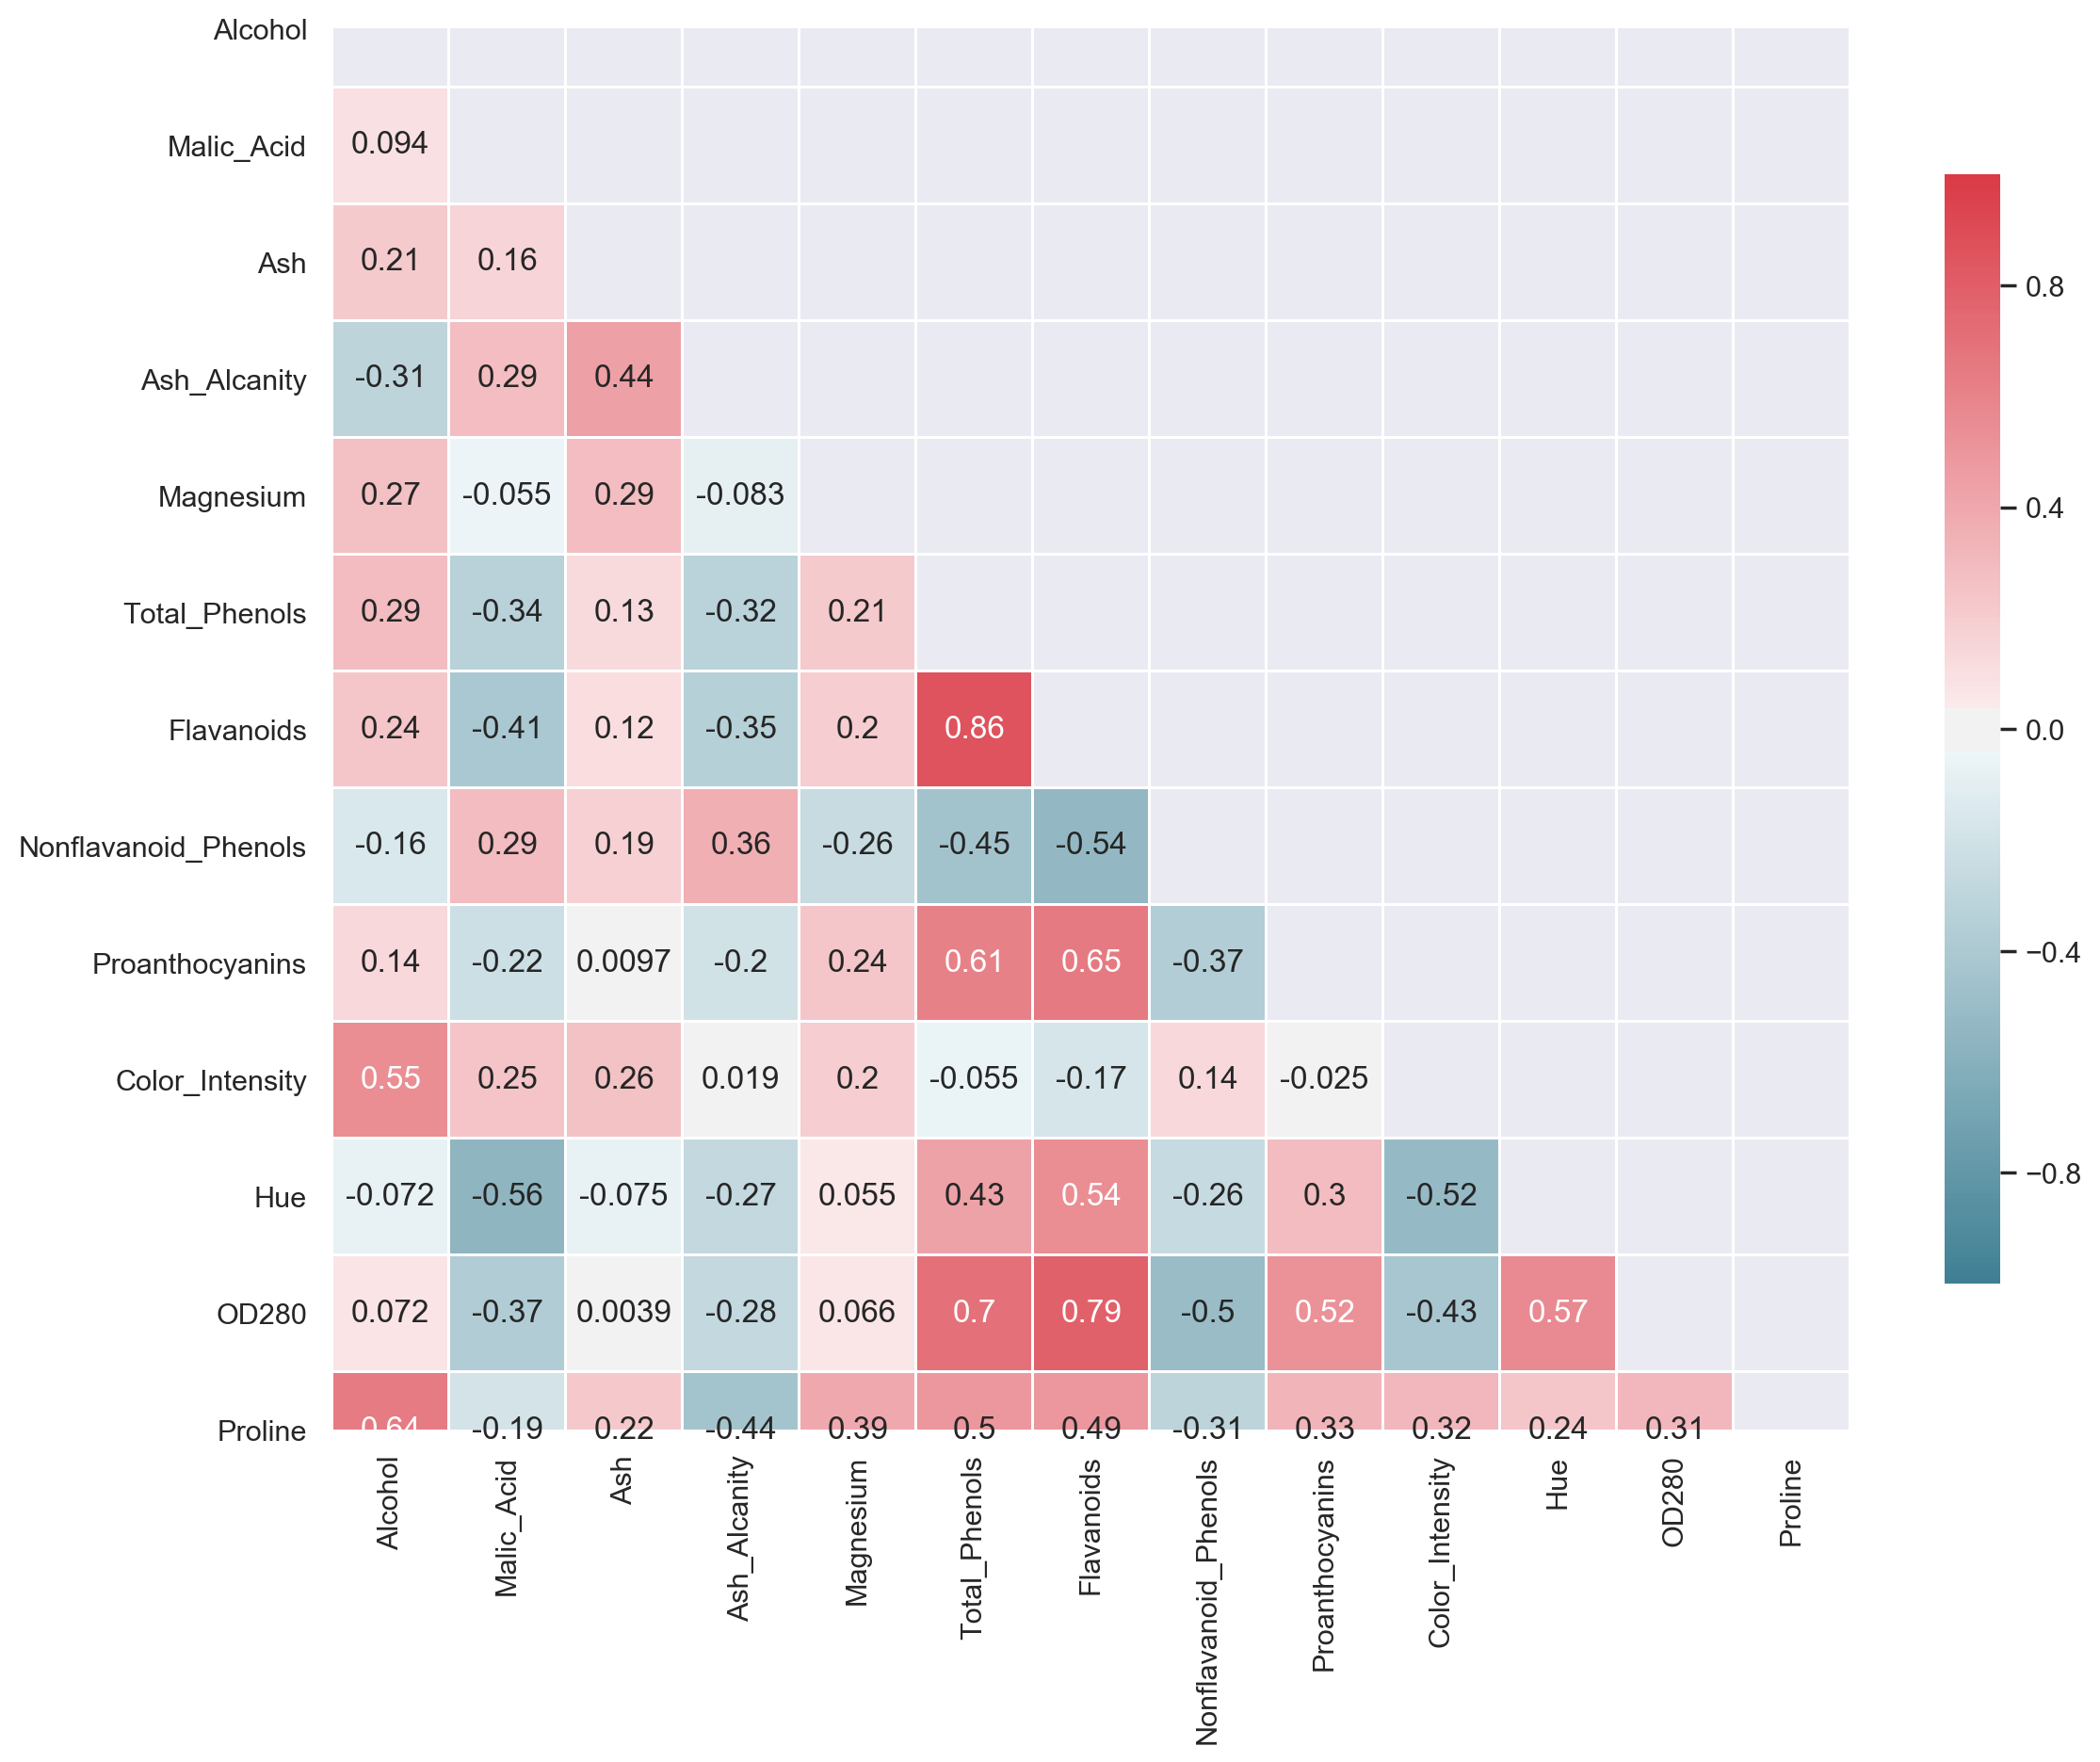

In [9]:
# Correlation heatmap
sns.set()
var_corr = wine.corr()
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13,13),dpi=200)
corr = wine.corr()
# Mask for the upper triangle part
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

In [10]:
#Identify highly correlated variables
tmp = [] #temporary used list
for i in range(len(var_corr.index)):
    for j in range(len(var_corr.columns)):
        if abs(var_corr.iloc[i][j]) > 0.6:  #smaller than negative 0.6 and greater than positive 0.6
            if j < i:  
                tmp.append([var_corr.index[i],var_corr.columns[j],var_corr.iloc[i][j]])

In [11]:
correlated_var = pd.DataFrame(tmp,columns=['var1','var2','corr'])
correlated_var

var1           var2      corr
0       Flavanoids  Total_Phenols  0.864564
1  Proanthocyanins  Total_Phenols  0.612413
2  Proanthocyanins     Flavanoids  0.652692
3            OD280  Total_Phenols  0.699949
4            OD280     Flavanoids  0.787194
5          Proline        Alcohol  0.643720

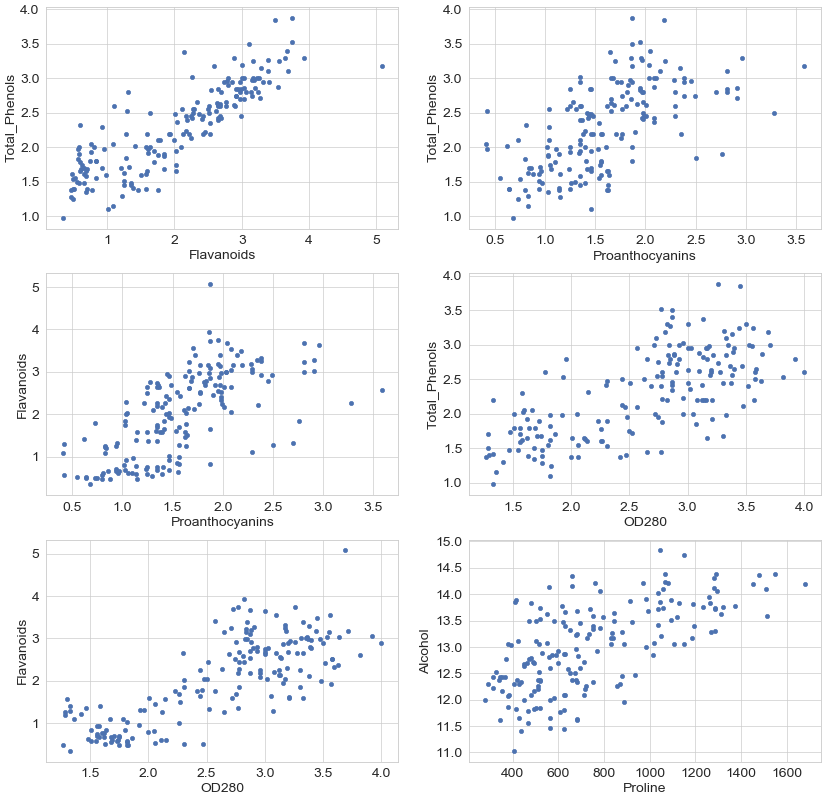

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
for i in range(len(correlated_var)):
    plt.subplot(3,2,i+1)
    plt.scatter(wine[correlated_var.var1[i]],wine[correlated_var.var2[i]])
    plt.xlabel(correlated_var.var1[i],size=20)
    plt.ylabel(correlated_var.var2[i],size=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

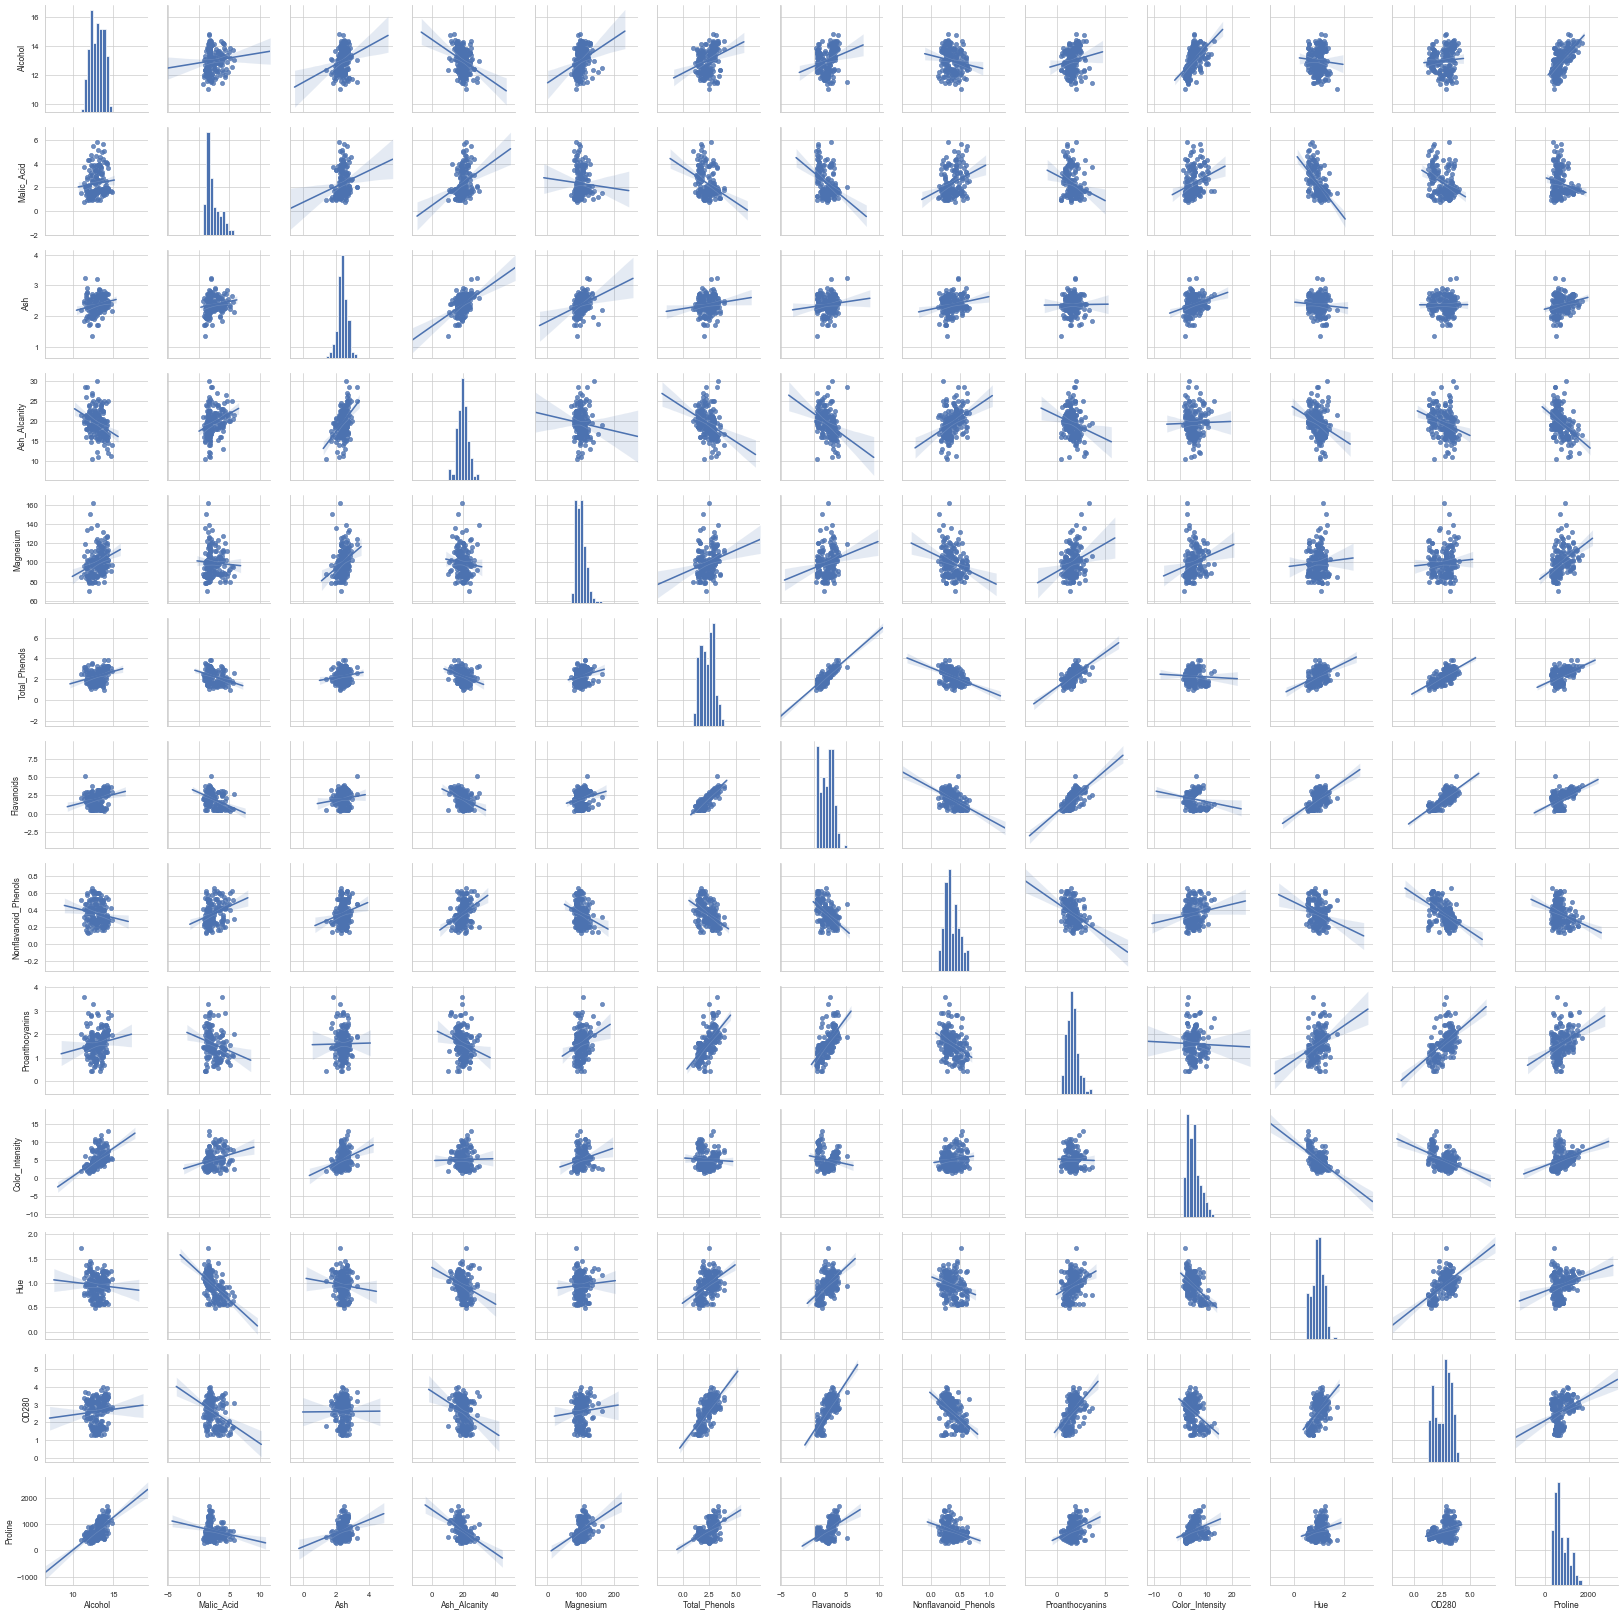

In [13]:
#Pairwise scatter plot
pairwise = sns.pairplot(wine, kind = "reg")

## 1.3 Normalizing data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine)
norm_wine = pd.DataFrame((scaler.transform(wine)),columns=wine.columns).iloc[:, :13]
norm_wine

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

# 2. Model Building

## 2.1 K-means Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics

## 2.1.1 Elbow Method for Determining the Optimal Number of Clusters

In [16]:
from scipy.spatial.distance import cdist
distortions = []
N = range(1,10)
for n in N:
    kms = KMeans(n_clusters=n, max_iter = 100)
    y = kms.fit_predict(norm_wine)
    distortions.append(sum(np.min(cdist(norm_wine, kms.cluster_centers_,'euclidean'),
                                 axis=1))/norm_wine.shape[0])

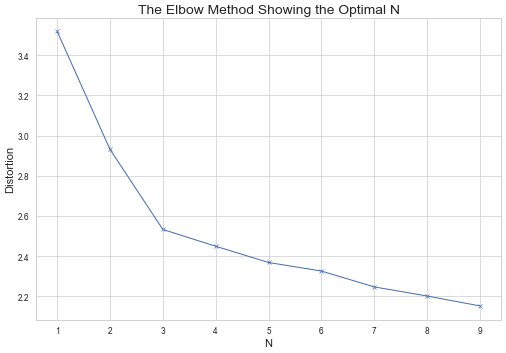

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(N, distortions, 'bx-')
plt.xlabel('N',size=16)
plt.ylabel('Distortion',size=16)
plt.title('The Elbow Method Showing the Optimal N',size=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 2.1.2 Clustering Result and Visualization

In [18]:
kms = KMeans(n_clusters=3, max_iter = 100)
y = kms.fit_predict(norm_wine)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
wine['kmeans_cluster_label'] = y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


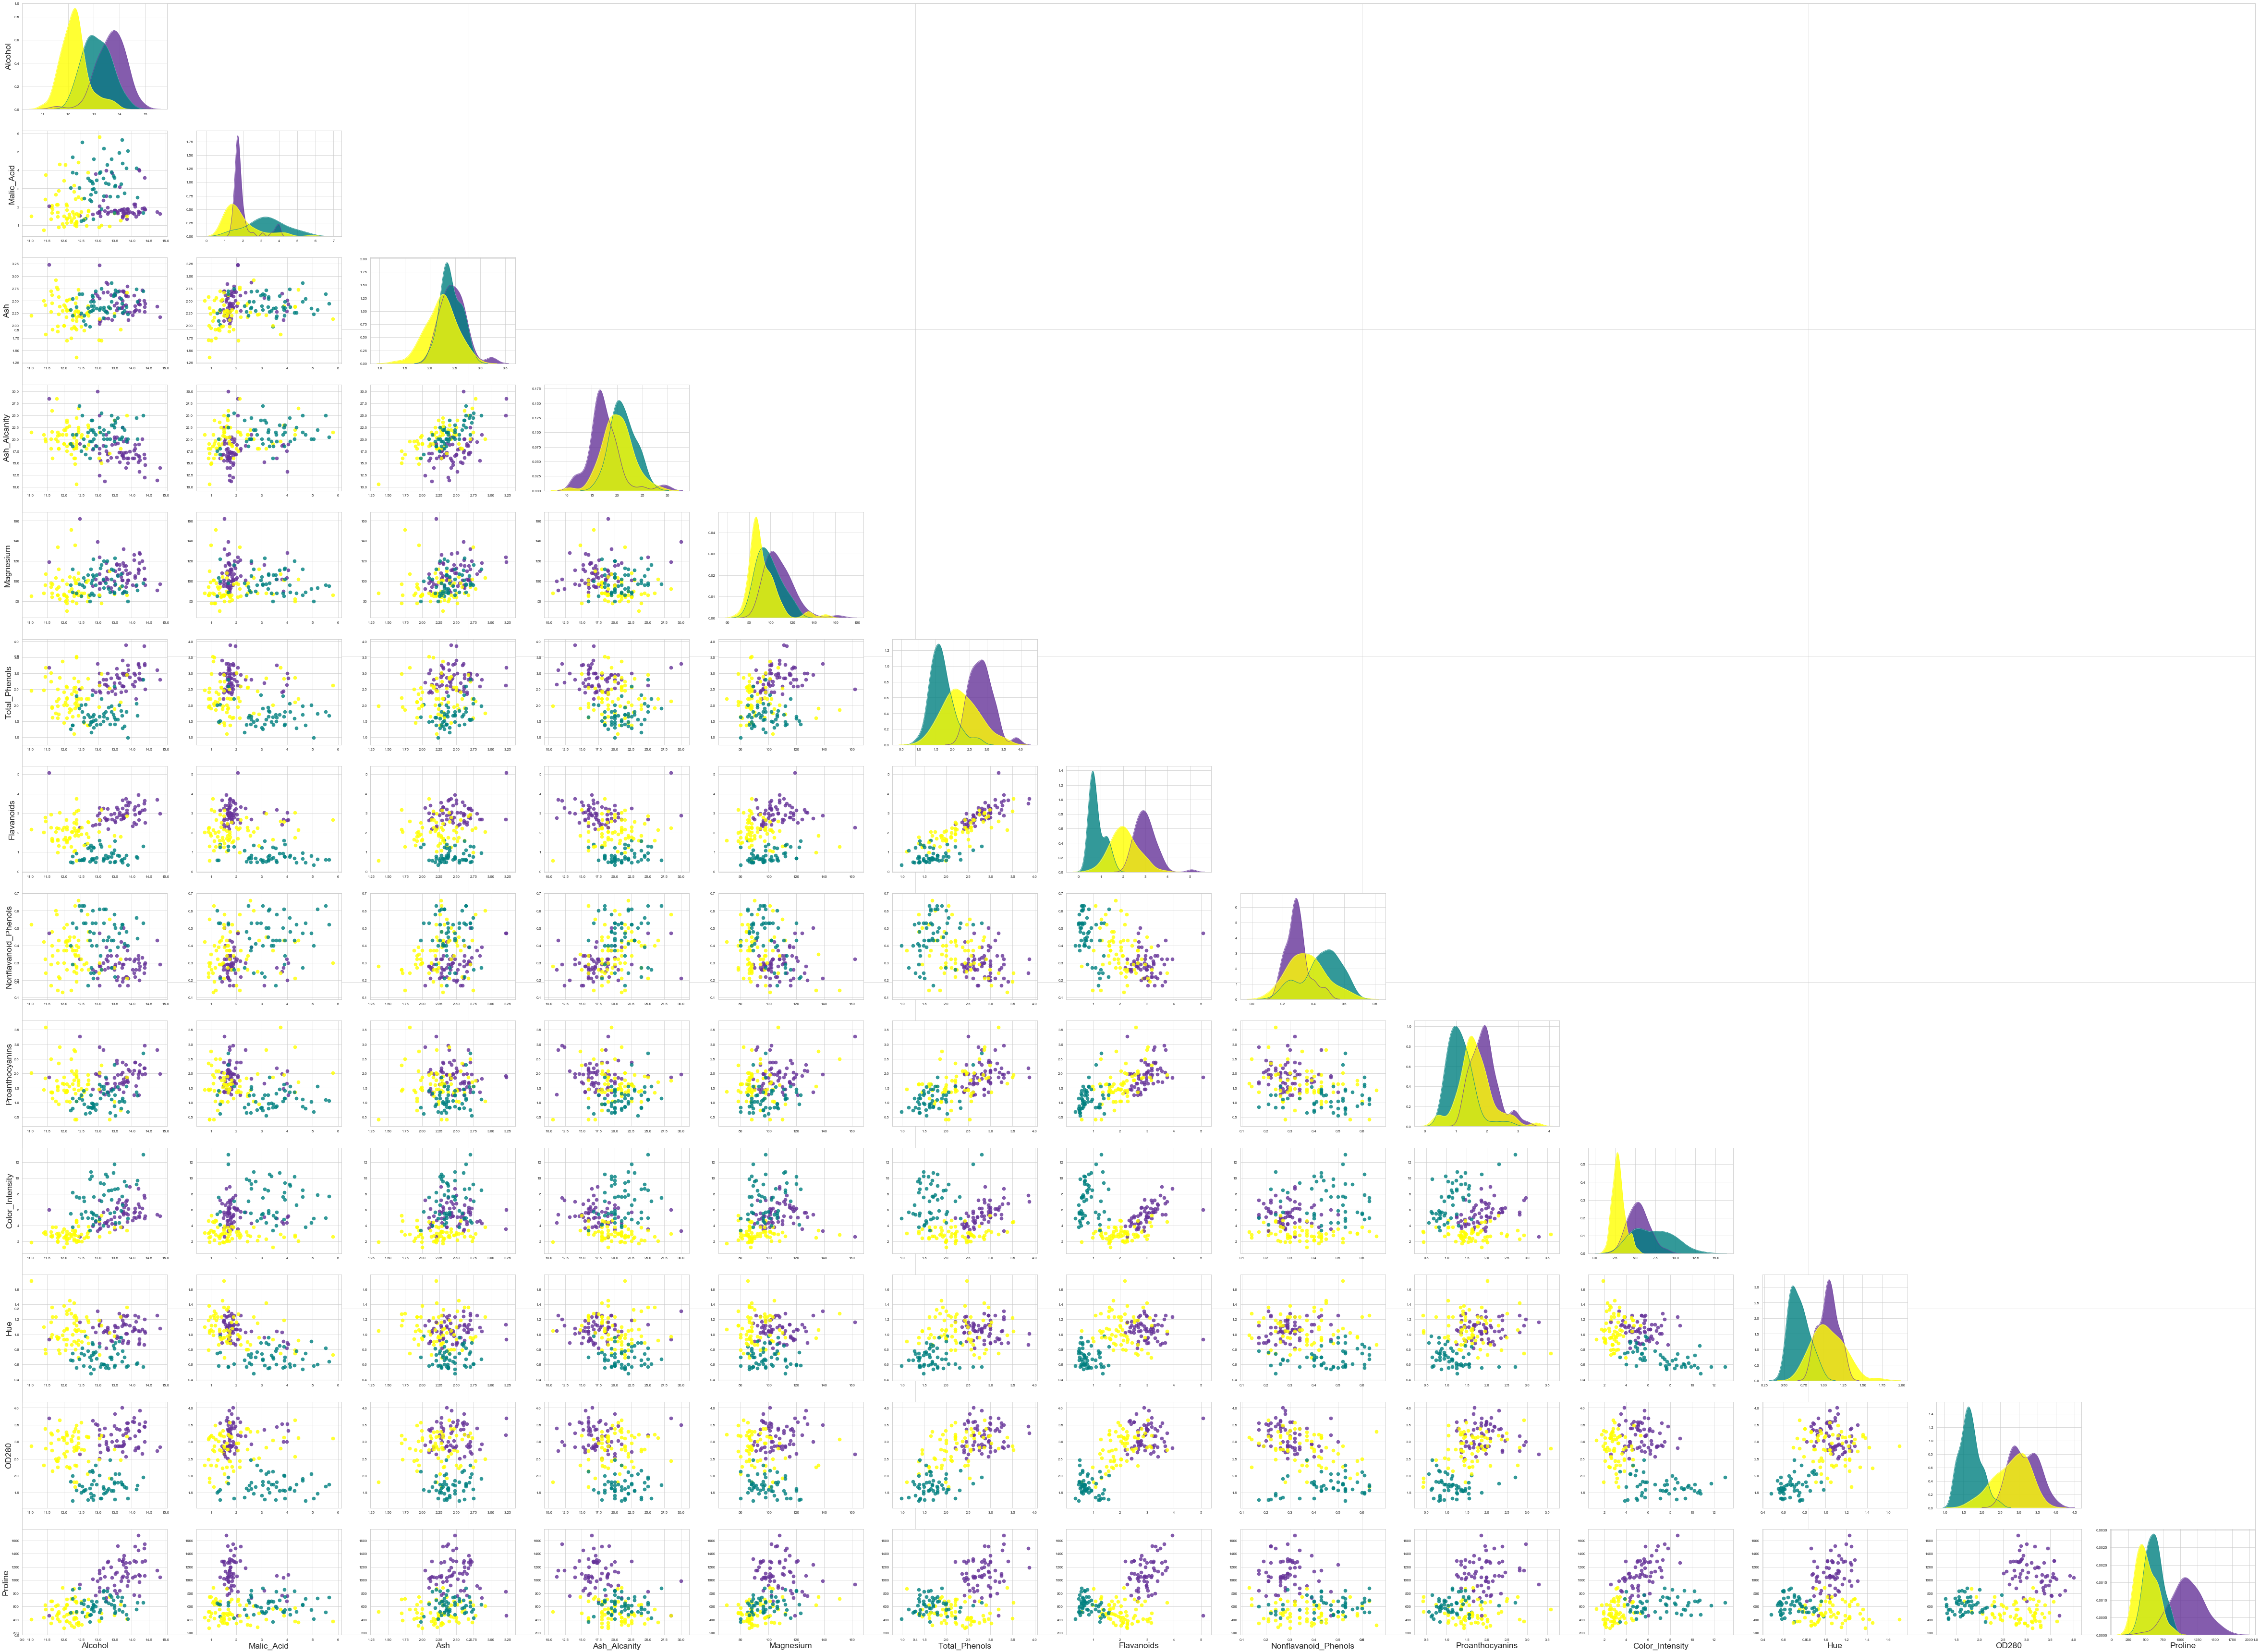

In [20]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(120,90))
for i in range(13):
    ax = fig.add_subplot(13, 13, i+13*i+1)
    sns.kdeplot(wine.loc[wine['kmeans_cluster_label']==0,wine.columns[i]], shade=True, color="rebeccapurple",legend=None, alpha=.8)
    sns.kdeplot(wine.loc[wine['kmeans_cluster_label']==1,wine.columns[i]], shade=True, color="teal", legend=None, alpha=.8)
    sns.kdeplot(wine.loc[wine['kmeans_cluster_label']==2,wine.columns[i]], shade=True, color="yellow",legend=None, alpha=.8)
    if i==0:
        plt.ylabel(wine.columns[i],size=25)
    if i==12:
        plt.xlabel(wine.columns[i],size=25)
    
for i in range(12):
    for j in range(12):
        for n in range(len(wine)):
            if i >= j:
                ax = fig.add_subplot(13, 13, j+1+13*(i+1))
                colors = ["rebeccapurple","teal","yellow"]
                cluster = wine['kmeans_cluster_label'].iloc[n]
                scatter = ax.scatter(wine.iloc[n,j],wine.iloc[n,i+1],c=colors[cluster],s=100, alpha=0.8)
        if j == 0:
            plt.ylabel(wine.columns[i+1],size=25)
        if j+1+13*(i+1) > 156 :
            plt.xlabel(wine.columns[j],size=25)

In [21]:
#To see the number of points in different clusters
#To see the cluster center
label = pd.Series(wine.kmeans_cluster_label).value_counts()
center = pd.DataFrame(kms.cluster_centers_)
label_center = pd.concat([center,label],axis=1)
label_center.columns = list(norm_wine)+[u'Cluster_number']
label_center

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.835232   -0.303810  0.364706     -0.610191   0.577587       0.885237   
1  0.164907    0.871547  0.186898      0.524367  -0.075473      -0.979330   
2 -0.926072   -0.394042 -0.494517      0.170602  -0.491712      -0.075983   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.977820             -0.562090         0.580287         0.171063   
1   -1.215248              0.726064        -0.779706         0.941539   
2    0.020813             -0.033534         0.058266        -0.901914   

        Hue     OD280   Proline  Cluster_number  
0  0.473984  0.779247  1.125185              62  
1 -1.164789 -1.292412 -0.407088              51  
2  0.461804  0.270764 -0.753846              65

## 2.1.3 Silhouette Coefficient

------------------------------------------------------------------------------------------


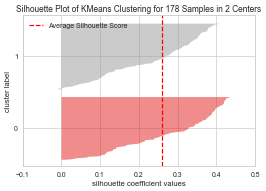

Silhouette Score: 0.25931695553182543
------------------------------------------------------------------------------------------


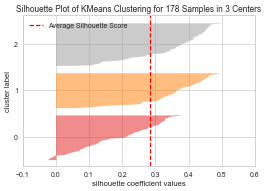

Silhouette Score: 0.2848589191898987
------------------------------------------------------------------------------------------


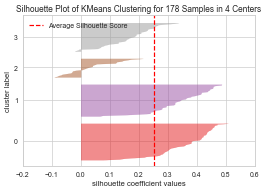

Silhouette Score: 0.25325581893084725
------------------------------------------------------------------------------------------


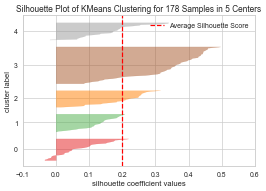

Silhouette Score: 0.2008268586722275
------------------------------------------------------------------------------------------


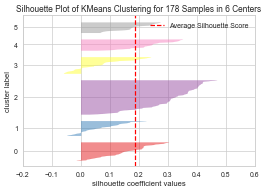

Silhouette Score: 0.1864865176915307
------------------------------------------------------------------------------------------


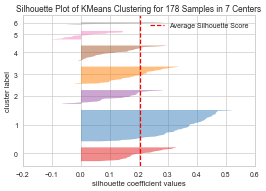

Silhouette Score: 0.20411398679819678
------------------------------------------------------------------------------------------


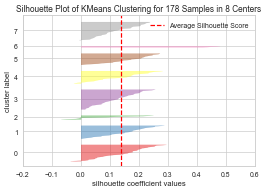

Silhouette Score: 0.1372846494823242
------------------------------------------------------------------------------------------


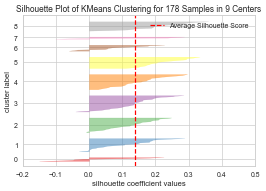

Silhouette Score: 0.13818243510305447
------------------------------------------------------------------------------------------


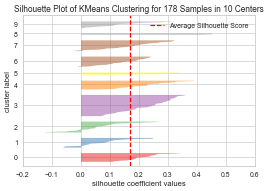

Silhouette Score: 0.16837652647782003
------------------------------------------------------------------------------------------
Optimal Number of Clusters: 3
Silhouette Score: 0.2848589191898987


In [22]:
#Visualizing silhouette plots for 2~10 clusters with K-means labels
from yellowbrick.cluster import SilhouetteVisualizer
lst=[]
for cluster in range(2,11):
    print('-'*90)
    plt.figure(figsize=(6,4))
    kmeans = KMeans(n_clusters = cluster, max_iter = 100)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(norm_wine)
    visualizer.show()
    kms_silhouette = metrics.silhouette_score(norm_wine, kmeans.labels_, metric ='euclidean')
    lst.append(kms_silhouette)
    print('Silhouette Score:', kms_silhouette)
print('-'*90)
max_index = lst.index(max(lst)) + 2 

print('Optimal Number of Clusters:',max_index)
print('Silhouette Score:', max(lst))

## 2.2 Gaussian Mixture Model

In [23]:
from sklearn.mixture import GaussianMixture as GMM

## 2.2.1 AIC&BIC

Text(0.5, 0, 'n_components')

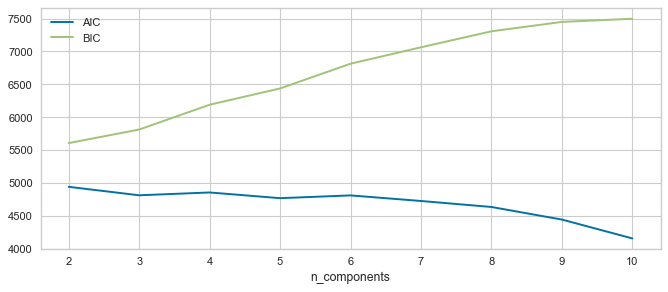

In [24]:
n_components = np.arange(2, 11)
AIC=[]
BIC=[]
for n in n_components:
    models = GMM(n).fit(norm_wine)
    AIC.append(models.aic(norm_wine))
    BIC.append(models.bic(norm_wine))
plt.figure(figsize=(10,4),dpi=80)
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend()
plt.xlabel('n_components')

## 2.2.2 Silhouette Coefficient for Determining N-components

In [25]:
from sklearn import metrics
sil=[]
for component in range(2,11):
    gmm = GMM(n_components=component).fit(norm_wine)
    gmm_cluster_label = gmm.predict(norm_wine)
    sil_score = metrics.silhouette_score(norm_wine, gmm_cluster_label, metric ='euclidean')
    sil.append(sil_score)
pd.DataFrame(sil,columns=['Silhouette Score'],index=np.arange(2,11))

Silhouette Score
2           0.258227
3           0.284859
4           0.263826
5           0.263996
6           0.171835
7           0.190122
8           0.118184
9           0.110072
10          0.106946

Text(0, 0.5, 'Coefficient')

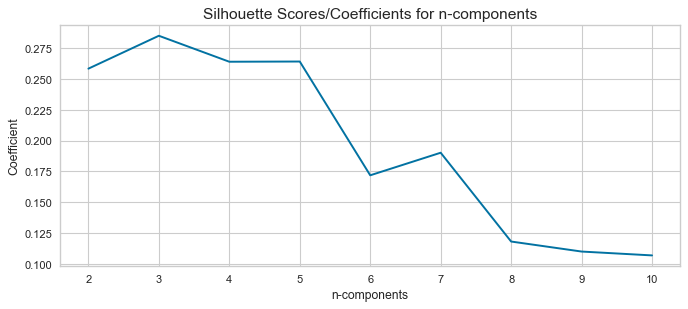

In [26]:
plt.figure(figsize=(10,4),dpi=80)
plt.plot(np.arange(2,11),sil)
plt.title('Silhouette Scores/Coefficients for n-components', fontsize=14)
plt.xlabel('n-components')
plt.ylabel('Coefficient')

## 2.2.3 Clustering Result and Visualization

In [27]:
#Generate GMM for 3 components
gmm = GMM(n_components=3).fit(norm_wine)
gmm_cluster_label = gmm.predict(norm_wine)
gmm_cluster_label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [28]:
wine['gmm_cluster_label'] = gmm_cluster_label

In [29]:
#Coordinates of the component means and sample counts in each component
component_means = pd.DataFrame(gmm.means_,index = ['0','1','2'],columns=norm_wine.columns)
count = pd.Series(wine.gmm_cluster_label).value_counts().sort_index()
component_means['Counts'] = pd.array(count)
component_means

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0 -0.941950   -0.366660 -0.393370      0.251213  -0.572895      -0.033494   
1  0.165170    0.871434  0.187847      0.525214  -0.074623      -0.979288   
2  0.815352   -0.332444  0.244800     -0.675761   0.636853       0.822140   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.081361              0.013235         0.007794        -0.884770   
1   -1.215590              0.725998        -0.779485         0.942590   
2    0.896753             -0.597821         0.619712         0.131888   

        Hue     OD280   Proline  Counts  
0  0.434344  0.292816 -0.781312      64  
1 -1.164894 -1.292796 -0.406596      51  
2  0.500564  0.746024  1.113952      63

In [30]:
#Draw ellipsoids based on components' mean centers and covariances
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        


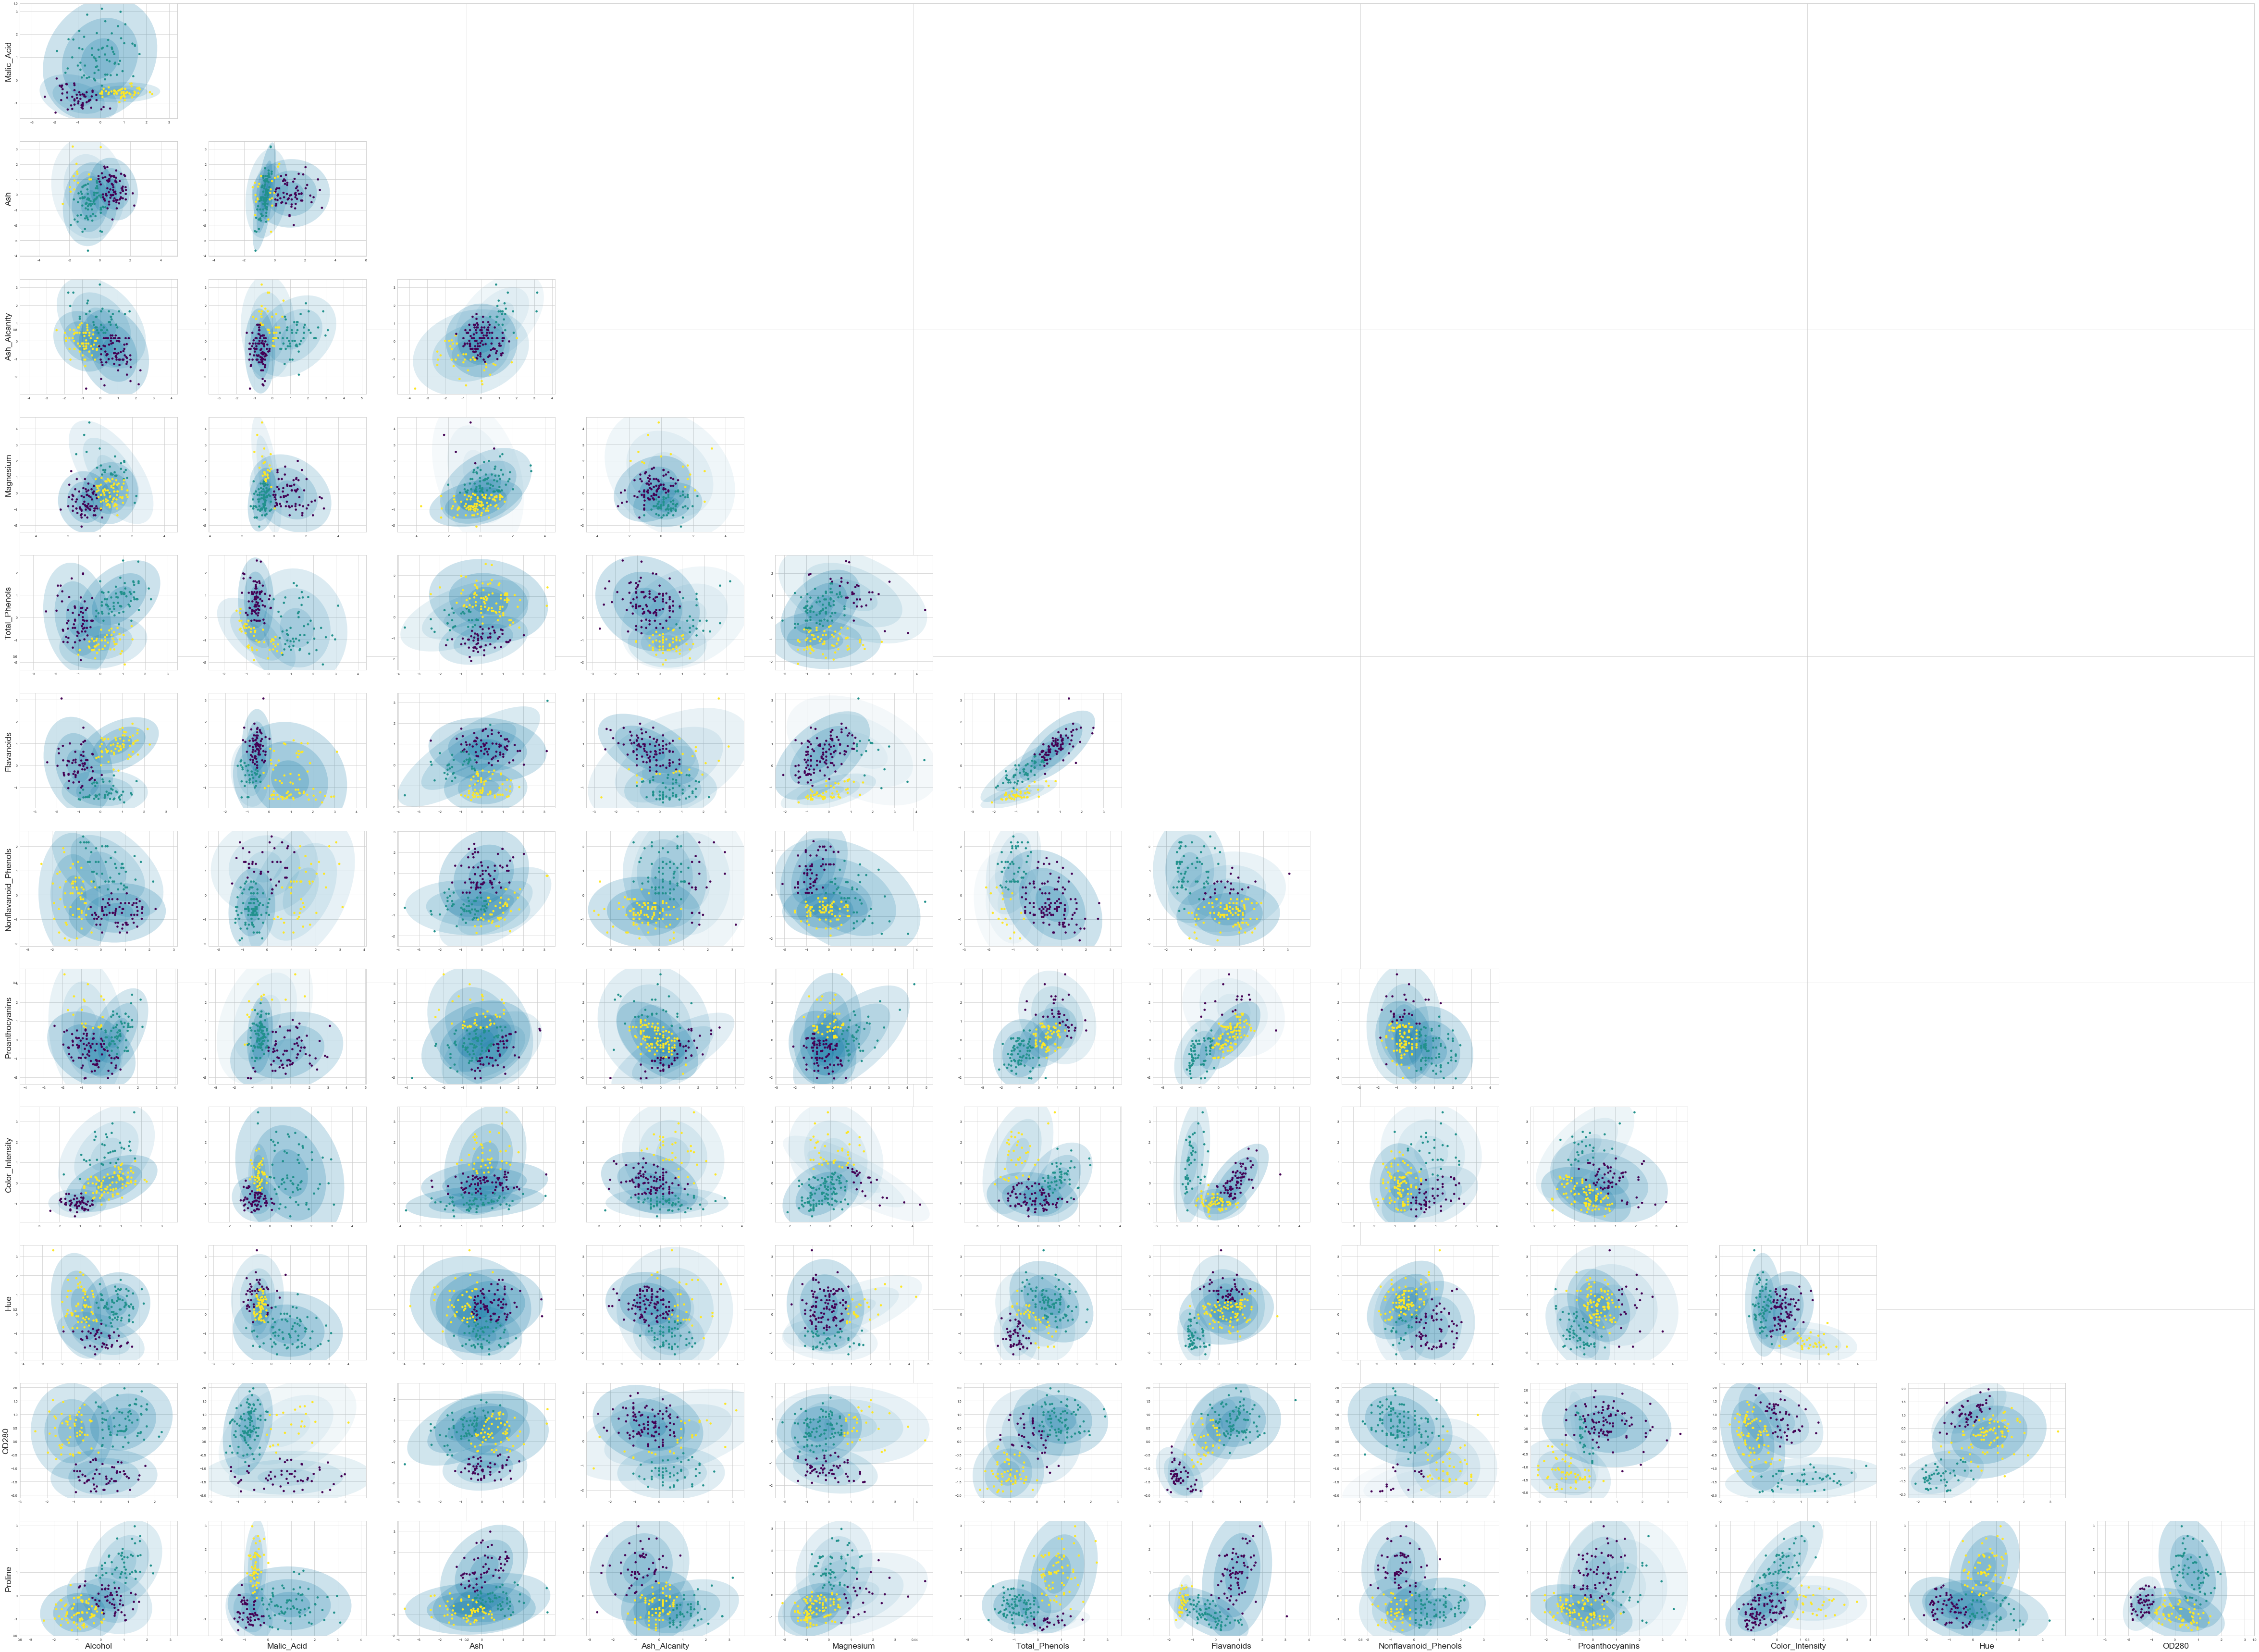

In [31]:
sns.set_style("whitegrid")
gmm = GMM(n_components=3)
fig, ax = plt.subplots(figsize=(120,90))
for i in range(12):
    for j in range(12):
        if i >= j:
            ax = fig.add_subplot(12, 12, j+12*i+1)
            plot_gmm(gmm,np.array([norm_wine.iloc[:,j],norm_wine.iloc[:,i+1]]).T)
        if j == 0:
            plt.ylabel(wine.columns[i+1],size=25)
        if j+12*i+1 > 132 :
            plt.xlabel(wine.columns[j],size=25)

## 2.3 Hierarchical Agglomerative Clustering

In [32]:
#Import modules related with Hierarchical Agglomerative Clustering 
import sklearn
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from matplotlib import cm

## 2.3.1 Linkage Calculation(Average) and Dendrogram

In [33]:
#calculate distances between each pair of samples with average linkage function 
#print the clustering result 
data=wine
row_clusters=linkage(pdist(data,metric='euclidean'),method='average')
print(pd.DataFrame(row_clusters,columns=['row label1','row label2','distance','no. of items in clust.'],index=['cluster%d'%(i+1) for i in range(row_clusters.shape[0])]))

            row label1  row label2    distance  no. of items in clust.
cluster1         160.0       165.0    2.610709                     2.0
cluster2          67.0       106.0    2.654713                     2.0
cluster3          13.0        50.0    2.949610                     2.0
cluster4           8.0         9.0    3.270076                     2.0
cluster5         101.0       119.0    3.479253                     2.0
...                ...         ...         ...                     ...
cluster173        18.0       337.0  179.689206                     6.0
cluster174       345.0       347.0  214.816687                    42.0
cluster175       348.0       349.0  271.113552                   130.0
cluster176       350.0       351.0  389.537767                    48.0
cluster177       352.0       353.0  606.973177                   178.0

[177 rows x 4 columns]


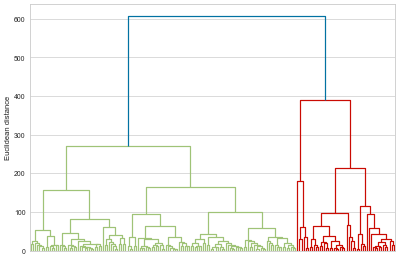

In [34]:
#Print a dendrogram based on clustering above
row_dendr=dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xticks([])
plt.show()

## 2.3.2 Clustering Results and Visualization

In [49]:
#Apply Hierarchical Agglomerative Clustering Algorithm, setting number of clusters equals to 2
#Print the numbers of items in each cluster and the cluster labels

num_of_clusters=2
ac=AgglomerativeClustering(n_clusters=num_of_clusters,affinity='euclidean',linkage='average')
ac.fit(data)
ac_labels=ac.fit_predict(data)


la_list=[]
for i in range(len(ac_labels)):
    la_list.append(ac_labels[i])
for i in range(num_of_clusters):
    i_num=la_list.count(i)
    print(str(i+1)+'th cluster has%s'%i_num)

print(ac_labels)

1th cluster has48
2th cluster has130
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


The silhouette score is 0.6587207813931497


Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

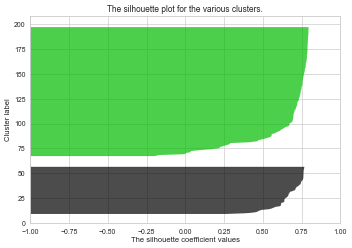

In [50]:
#Access clustering quality with silhouette score&values

sample_silh_score=metrics.silhouette_score(data,ac_labels,metric='euclidean')
print('The silhouette score is %s'%sample_silh_score)
sample_silh_vals=silhouette_samples(wine,ac_labels)
fig,axs=plt.subplots(1,1)
axs.set_xlim([-1, 1])
axs.set_ylim([0, len(wine) + (num_of_clusters + 1) * 10])

y_lower=10
for i in range(num_of_clusters):
    ith_clu_silh_vals=sample_silh_vals[ac_labels==i]
    ith_clu_silh_vals.sort()
    size_cluster_i = ith_clu_silh_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / (i+1))
    axs.fill_betweenx(np.arange(y_lower, y_upper), -1, ith_clu_silh_vals,facecolor=color, edgecolor=color, alpha=0.7)
    y_lower=y_upper+10

axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_title("The silhouette plot for the various clusters.")

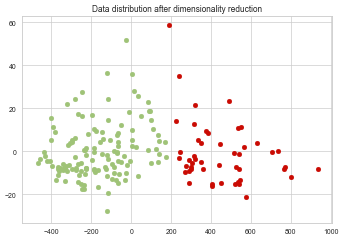

In [51]:
#Visualize the clustered data in 2 dimensions with PCA
wine_ac=pd.DataFrame(wine)
wine_ac['label']=ac_labels
pca= sklearn.decomposition.PCA(n_components=2)
new_pca=pd.DataFrame(pca.fit_transform(wine_ac))
for i,c in zip(range(num_of_clusters),'rgbcmykw'):
    d=new_pca[wine_ac['label']==i]
    plt.scatter(d[0],d[1],c=c)

plt.title('Data distribution after dimensionality reduction')

plt.show()

# 3. Dimensional Reduction: PCA

## 3.1 Standardize Data

In [36]:
norm_wine

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

## 3.2 Choose the Number of Factors

In [37]:
from factor_analyzer import FactorAnalyzer
PCA = FactorAnalyzer(n_factors=25,method='principal',rotation='varimax')
PCA.fit(norm_wine)

#Check eigenvalues
ev,v = PCA.get_eigenvalues()

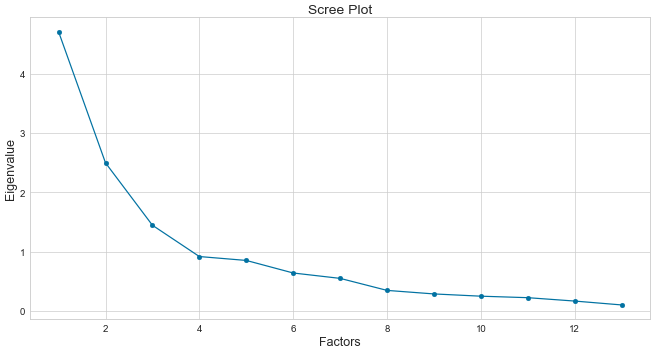

In [38]:
#Create scree plot
plt.figure(figsize=(16,8))
plt.scatter(range(1,norm_wine.shape[1]+1),ev)
plt.plot(range(1,norm_wine.shape[1]+1),ev)
plt.title('Scree Plot',size=20)
plt.xlabel('Factors',size=18)
plt.ylabel('Eigenvalue',size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 3.3 PCA Results

In [39]:
#To see how well can each factor be explained after decompositon
fa = FactorAnalyzer(n_factors=4,method='principal',rotation='varimax')   #To maximum the variance
fa.fit(norm_wine)
factor_variance = pd.DataFrame(fa.get_communalities(),index = wine.columns[:13],columns=['substract'])
print("Communality:")
factor_variance

Communality:


substract
Alcohol                0.744602
Malic_Acid             0.685586
Ash                    0.858707
Ash_Alcanity           0.814968
Magnesium              0.457515
Total_Phenols          0.810485
Flavanoids             0.895927
Nonflavanoid_Phenols   0.501418
Proanthocyanins        0.644794
Color_Intensity        0.769600
Hue                    0.787660
OD280                  0.804456
Proline                0.792153

In [40]:
#Compute the factor loading
fa_principal = pd.DataFrame(fa.loadings_, index = wine.columns[:13],
                            columns=['component1','component2','component3','component4'])

print("Factors Loading:")
fa_principal

Factors Loading:


component1  component2  component3  component4
Alcohol                 0.162001    0.812672   -0.209216   -0.118951
Malic_Acid             -0.160521   -0.059745   -0.790289    0.178024
Ash                     0.061922    0.343717   -0.041338    0.857335
Ash_Alcanity           -0.214529   -0.348342   -0.236377    0.769239
Magnesium               0.104983    0.587464    0.185289    0.258934
Total_Phenols           0.841689    0.252691    0.195077    0.011667
Flavanoids              0.874697    0.192806    0.305891   -0.009384
Nonflavanoid_Phenols   -0.583111   -0.137249   -0.150293    0.346373
Proanthocyanins         0.797203    0.095401   -0.012385    0.002476
Color_Intensity        -0.194495    0.673300   -0.525531    0.047490
Hue                     0.360629   -0.058879    0.808003   -0.035649
OD280                   0.819696   -0.072265    0.355047   -0.035699
Proline                 0.341811    0.798259    0.176124   -0.084145

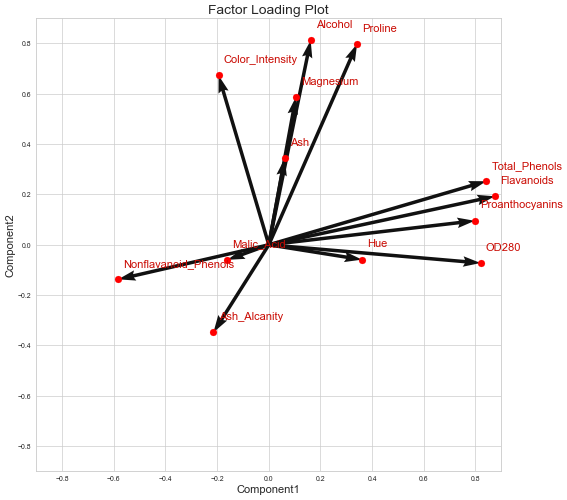

In [41]:
#Base on the first and second components, visualizing the factor loading

#Create vectors
vector = np.array([[0,0,fa_principal.component1,fa_principal.component2]])
X, Y, U, V = zip(*vector)

#Plot factor loading plot
plt.figure(figsize=(12,12))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-0.9,0.9])
ax.set_ylim([-0.9,0.9])

for i in range(len(fa_principal)):
    x = fa_principal.component1[i]
    y = fa_principal.component2[i]
    plt.scatter(x,y, color='red',s=100)
    plt.text(x+0.02,y+0.05, fa_principal.index[i], fontsize=16,color='r')

plt.xlabel("Component1",size=16)
plt.ylabel("Component2",size=16)
plt.title('Factor Loading Plot',size=20)
plt.show()

In [42]:
#Compute the explaination results which show that four components explains 73.6% of the variances
explaination = pd.DataFrame(np.array(fa.get_factor_variance()).T, index=['component1','component2','component3','component4'],
                           columns = ['totals','variance%','accumulative_var%'])

print("Contribution Rate of Accumulated Variance :")

explaination

Contribution Rate of Accumulated Variance :


totals  variance%  accumulative_var%
component1  3.518595   0.270661           0.270661
component2  2.476810   0.190524           0.461185
component3  2.000739   0.153903           0.615088
component4  1.571726   0.120902           0.735990

In [43]:
#Transform the factors to component scores
transform_wine = pd.DataFrame(fa.transform(norm_wine),columns=['component1','component2','component3','component4'])
transform_wine

component1  component2  component3  component4
0      1.079547    1.368110    0.427116   -0.148844
1      0.272504    0.588999    0.710861   -1.757141
2      1.521638    0.491785   -0.329634    0.587959
3      1.633911    1.865322   -0.492253   -0.152977
4      0.564595    0.417649    0.354468    1.709857
..          ...         ...         ...         ...
173   -0.832631    0.400752   -2.194760    0.104115
174   -0.795151    0.422170   -1.316283    0.543076
175   -1.101560    1.169063   -1.634304   -0.208926
176   -1.433155    1.252171   -0.624744    0.193735
177   -0.748619    0.658183   -1.904041    1.318345

[178 rows x 4 columns]

## 3.4 Components and Cluster

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'second component (19.05%)')

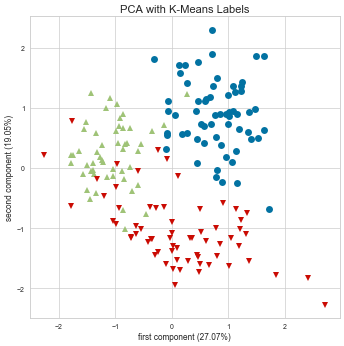

In [44]:
import mglearn
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(transform_wine.iloc[:,0],transform_wine.iloc[:,1],wine.kmeans_cluster_label)
plt.title("PCA with K-Means Labels",fontsize=16)
plt.xlabel("first component (27.07%)",size=12)
plt.ylabel("second component (19.05%)",size=12)